In [1]:
import tensorflow as tf
print(tf.__version__)

2.9.2


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('/content/drive/MyDrive/DeepLearning_UmarKhan/moore.csv',header=None)
print(data.shape)
data.head()

(162, 2)


,0,1
0,1971,2300
1,1972,3500
2,1973,2500
3,1973,2500
4,1974,4100


In [4]:
x=data.values[:,0].reshape(-1,1)
y=data.values[:,1]

print(x.shape,y.shape)

(162, 1) (162,)


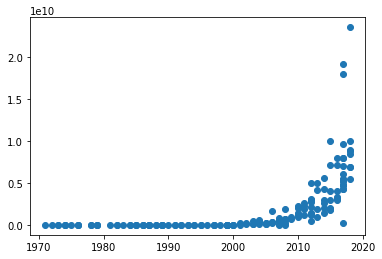

In [5]:
plt.scatter(x,y)

In [6]:
Y=np.log(y)

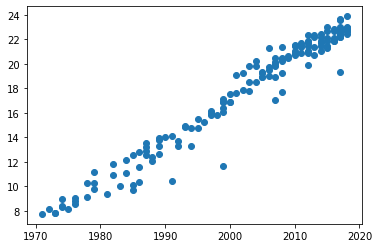

In [7]:
plt.scatter(x,Y)

In [8]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,Y,test_size=0.1) # y 
print(x_train.shape,y_train.shape)

(145, 1) (145,)


In [9]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [26]:
mrs=tf.keras.models.Sequential()

mrs.add(tf.keras.layers.Dense(1,input_shape=(1,)))  # wx+b == {mx+c}

mrs.compile(optimizer=tf.keras.optimizers.SGD(0.001,0.9),loss='mse') #SGD with LR,momentum # metric 

mrs.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [27]:
def schedule(epoch,lr): #standard def
  if(epoch>=50 and epoch<100):
    return 0.0001 # reduce LR 
  return 0.001 #start with bigger values of LR

scheduler=tf.keras.callbacks.LearningRateScheduler(schedule)

In [28]:
# print(mrs.optimizer.lr.numpy())

mrs_hist=mrs.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=150,verbose=True,callbacks=[scheduler])

# print(mrs.optimizer.lr.numpy())

Epoch 1/150
5/5 [==============================] - 0s 33ms/step - loss: 324.7693 - val_loss: 332.1435 - lr: 0.0010
Epoch 2/150
5/5 [==============================] - 0s 7ms/step - loss: 300.6109 - val_loss: 295.0925 - lr: 0.0010
Epoch 3/150
5/5 [==============================] - 0s 7ms/step - loss: 262.9320 - val_loss: 251.4574 - lr: 0.0010
Epoch 4/150
5/5 [==============================] - 0s 7ms/step - loss: 222.3391 - val_loss: 207.8704 - lr: 0.0010
Epoch 5/150
5/5 [==============================] - 0s 10ms/step - loss: 182.3759 - val_loss: 168.9530 - lr: 0.0010
Epoch 6/150
5/5 [==============================] - 0s 7ms/step - loss: 147.4978 - val_loss: 135.3630 - lr: 0.0010
Epoch 7/150
5/5 [==============================] - 0s 8ms/step - loss: 117.3551 - val_loss: 107.4275 - lr: 0.0010
Epoch 8/150
5/5 [==============================] - 0s 12ms/step - loss: 93.0848 - val_loss: 84.3814 - lr: 0.0010
Epoch 9/150
5/5 [==============================] - 0s 8ms/step - loss: 72.6892 - val_lo

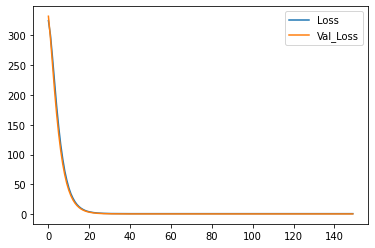

In [29]:
plt.plot(mrs_hist.history['loss'], label='Loss')
plt.plot(mrs_hist.history['val_loss'], label='Val_Loss')
plt.legend()

In [ ]:
#evaluating and making predictions 

In [ ]:
print(mrs.metrics_names)
print(mrs.evaluate(x_test,y_test,verbose=0))

['loss']
2.3950390815734863


In [ ]:
x=x_test[5]
print(x.shape)
x=x.reshape(1,-1)
print(x.shape)
y=y_test[5]
print(y)

(1,)
(1, 1)
17.073607095985757


In [ ]:
out= mrs.predict(x)
out

1/1 [==============================] - 0s 20ms/step


array([[19.449806]], dtype=float32)

1/1 [==============================] - 0s 19ms/step


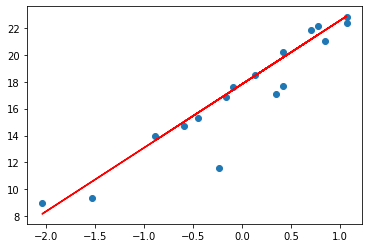

In [ ]:
y_hat=mrs.predict(x_test).flatten()
plt.scatter(x_test,y_test)
plt.plot(x_test,y_hat,color='red')

In [ ]:
w,b=mrs.layers[0].get_weights()
print(w.shape,b.shape)

(1, 1) (1,)


In [ ]:
w,b

(array([[4.729749]], dtype=float32), array([17.814152], dtype=float32))

In [ ]:
y_hat_2=(np.dot(x_test,w)+b).flatten()

In [ ]:
np.allclose(y_hat,y_hat_2)

True

In [ ]:
# saving and loading model 

In [ ]:
mrs.save('mrs_model.h5')

In [ ]:
!ls

moore.csv  mrs_model.h5  sample_data


In [ ]:
model=tf.keras.models.load_model('mrs_model.h5')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.layers[0].get_weights()

[array([[4.729749]], dtype=float32), array([17.814152], dtype=float32)]